DATA DESC

datetime – The timestamp showing the exact date and hour of the bike rentals.

season – Categorical value representing the season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

weather – Categorical value describing the weather condition (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow).

temp – The normalized temperature (usually in Celsius) at that hour.

humidity – The normalized humidity level at that hour.

windspeed – The normalized wind speed at that hour.

casual – The count of bike rentals by non-registered (temporary) users.

registered – The count of bike rentals by registered users.

count – The total number of bike rentals (casual + registered) at that hour.

In [132]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [133]:
#Loading the Ola data file

import pandas as pd 
data=pd.read_csv("ola.csv")
data

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137
...,...,...,...,...,...,...,...,...,...
10881,2012-03-29 09:00:00,4,4,NaN,NaN,NaN,48,28,177.565718
10882,2012-03-29 10:00:00,3,4,16.149249,69.572176,24.725833,4,1,113.712131
10883,2012-03-29 11:00:00,3,3,20.303661,148.447082,40.606129,38,10,209.684018
10884,2012-03-29 12:00:00,2,4,17.425577,135.793223,50.788697,36,15,149.063403


BASIC DATA INSIGHTS

In [134]:
data.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        9254 non-null   float64
 4   humidity    9254 non-null   float64
 5   windspeed   9254 non-null   float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 765.5+ KB


In [5]:
data.shape

(10886, 9)

In [6]:
data.describe()

,season,weather,temp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,9254.000000,9254.000000,9254.000000,10886.000000,10886.000000,10886.000000
mean,2.493937,2.491916,23.240116,124.452421,34.549616,24.517545,99.551442,224.177267
std,1.120531,1.123139,20.311144,75.568291,28.417263,14.390014,57.541131,75.228602
min,1.000000,1.000000,-22.743852,32.713561,-1.407737,0.000000,0.000000,-12.769738
25%,1.000000,1.000000,12.470555,87.846187,17.963252,12.000000,50.000000,170.140221
50%,2.000000,2.000000,20.743790,112.180064,30.945593,25.000000,100.000000,224.257587
75%,3.000000,4.000000,29.394576,137.301002,44.029018,37.000000,149.000000,278.407366
max,4.000000,4.000000,211.102548,672.687236,244.921965,49.000000,199.000000,464.839068


In [135]:
data.isnull().sum()

datetime         0
season           0
weather          0
temp          1632
humidity      1632
windspeed     1632
casual           0
registered       0
count            0
dtype: int64

In [136]:
"""Fill missing values in columns , coz 1632 is 15% of missing data we can't drop it coz it may reduce too much data 
nd the model can become less accurate coz u loose weather patterns
"""

data['temp'] = data['temp'].fillna(data['temp'].median())
data['humidity'] = data['humidity'].fillna(data['humidity'].median())
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [137]:
data.isnull().sum()

datetime      0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [138]:
data.duplicated().sum()

np.int64(0)

FEATURE ENGINEERING

In [ ]:
#Rounding float values
data['temp'] = data['temp'].round(1)
data['humidity'] = data['humidity'].round(0)
data['windspeed'] = data['windspeed'].round(1)
data['count'] = data['count'].round(0)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Features for clustering
clust_features = data[['temp', 'humidity', 'windspeed']].fillna(method='ffill').fillna(method='bfill')

# KMeans with 10 clusters
k = 20
km = KMeans(n_clusters=k, random_state=42)
data['location'] = km.fit_predict(clust_features)

# Map 10 clusters to 10 city names
location_names = {
    0: 'Andheri',
    1: 'Bandra',
    2: 'Dadar',
    3: 'Ghatkopar',
    4: 'Thane',
    5: 'Borivali',
    6: 'Kurla',
    7: 'Vile Parle',
    8: 'Colaba',
    9: 'Mulund',
    10: 'Chembur',
    11: 'Powai',
    12: 'Sion',
    13: 'Matunga',
    14: 'Byculla',
    15: 'Worli',
    16: 'Lower Parel',
    17: 'Santacruz',
    18: 'Malad',
    19: 'Kandivali'
}

data['location'] = data['location'].map(location_names)

# Encoding the mapped names
le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])


C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_1648\1138154048.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clust_features = data[['temp', 'humidity', 'windspeed']].fillna(method='ffill').fillna(method='bfill')


In [ ]:

# Convert datetime into proper format
data['datetime'] = pd.to_datetime(data['datetime'])

#Extracting new columns from datetime for better understanding

data['hour'] = data['datetime'].dt.hour
data['date'] = data['datetime'].dt.day
data['weekday'] = data['datetime'].dt.weekday
data['month'] = data['datetime'].dt.month


# Create lag features
data['before_1_hr'] = data['count'].shift(1)
data['before_2_hr'] = data['count'].shift(2)
data['before_3_hr'] = data['count'].shift(3)
data['before_4_hr'] = data['count'].shift(4)
data['before_5_hr'] = data['count'].shift(5)

# rolling features
data['roll_3'] = data['count'].rolling(3).mean()
data['roll_6'] = data['count'].rolling(6).mean()

# Droping rows with NaN caused by lag/rolling
data = data.dropna().reset_index(drop=True)




In [13]:
data.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,location,...,date,weekday,month,before_1_hr,before_2_hr,before_3_hr,before_4_hr,before_5_hr,roll_3,roll_6
0,2011-01-01 05:00:00,4,1,7.320588,114.293268,28.498988,20,20,103.664368,6,...,1,5,1,315.867137,132.169549,224.278595,340.457093,315.731778,183.900352,238.694753
1,2011-01-01 06:00:00,1,4,33.223060,84.544883,39.778734,37,158,348.642028,9,...,1,5,1,103.664368,315.867137,132.169549,224.278595,340.457093,256.057844,244.179795
2,2011-01-01 07:00:00,1,1,17.395276,74.514142,44.278200,35,185,333.139644,9,...,1,5,1,348.642028,103.664368,315.867137,132.169549,224.278595,261.815347,242.960220
3,2011-01-01 08:00:00,3,3,22.477230,96.838202,43.266830,22,174,293.591311,6,...,1,5,1,333.139644,348.642028,103.664368,315.867137,132.169549,325.124327,254.512339
4,2011-01-01 09:00:00,2,1,20.743790,112.180064,30.945593,28,22,181.639089,6,...,1,5,1,293.591311,333.139644,348.642028,103.664368,315.867137,269.456681,262.757263


CHECKING OUTLIERS

In [ ]:
#Number of outliers in evry columns
Q1 = data.quantile(0.25)      
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).sum()

datetime         0
season           0
weather          0
temp           385
humidity       447
windspeed      331
casual           0
registered       0
count            6
location         0
hour             0
date             0
weekday          0
month            0
before_1_hr      6
before_2_hr      6
before_3_hr      6
before_4_hr      6
before_5_hr      6
roll_3           8
roll_6           1
dtype: int64

In [ ]:
#Removing humidity in the range of count 
max_count = data['count'].max()
max_count
data= data[data['humidity'] <= max_count]

to_remove = data[data['humidity'] > max_count].shape[0]
print("Rows that would be removed:", to_remove)


Rows that would be removed: 0


In [ ]:
#Humidity n Count r in same range
print("Max humidity :", data['humidity'].max())
print("Max count    :", data['count'].max())


Max humidity : 464.0
Max count    : 465.0


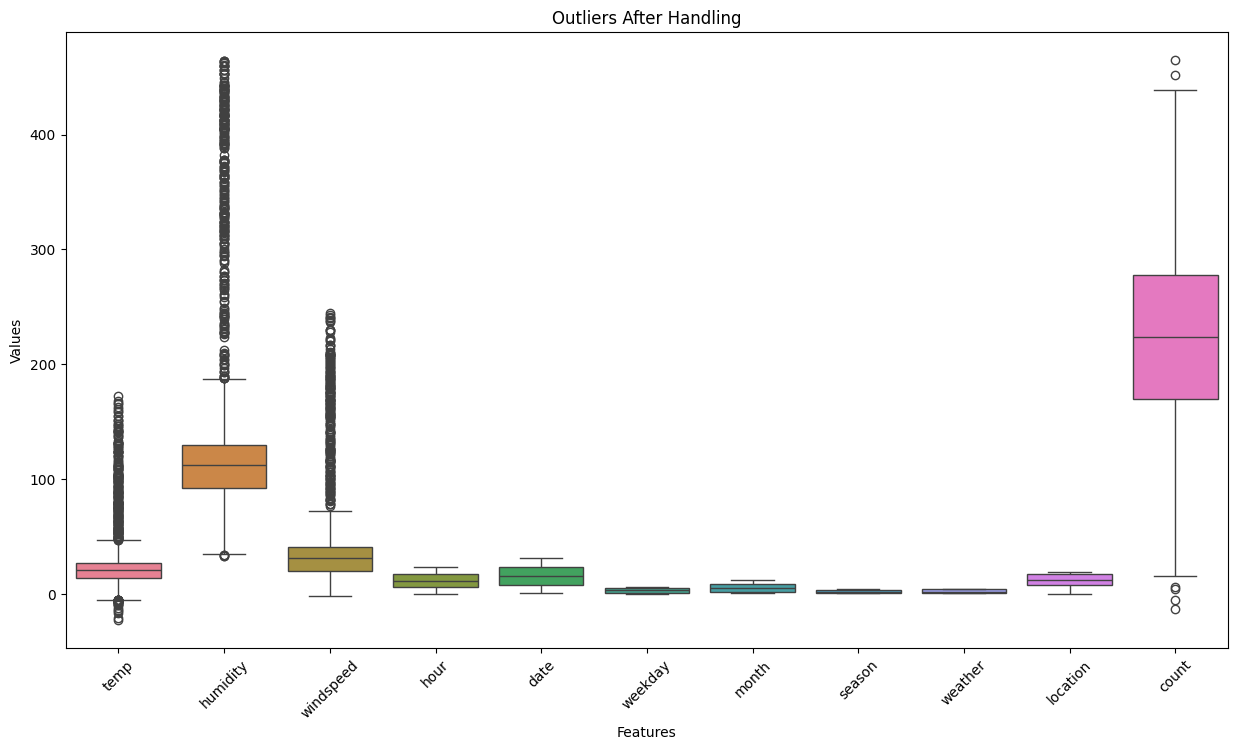

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
numeric_cols = ['temp','humidity','windspeed','hour','date','weekday','month','season','weather','location','count']
sns.boxplot(data=data[numeric_cols])
plt.title("Outliers After Handling", color="black")
plt.xlabel("Features", color='black')
plt.ylabel("Values", color='black')
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')  
plt.show()


In [ ]:
# SAVED FINAL CLEANED FILE
cleaned_path = "cleaned_ola_data.csv"
data.to_csv(cleaned_path, index=False)

print("Cleaned file saved as:", cleaned_path)
print("Shape:", data.shape)
print("Columns:", list(data.columns))


Cleaned file saved as: cleaned_ola_data.csv
Shape: (10737, 21)
Columns: ['datetime', 'season', 'weather', 'temp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'location', 'hour', 'date', 'weekday', 'month', 'before_1_hr', 'before_2_hr', 'before_3_hr', 'before_4_hr', 'before_5_hr', 'roll_3', 'roll_6']


EXPLORATORY DATA ANALYSIS

C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_1648\217058530.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




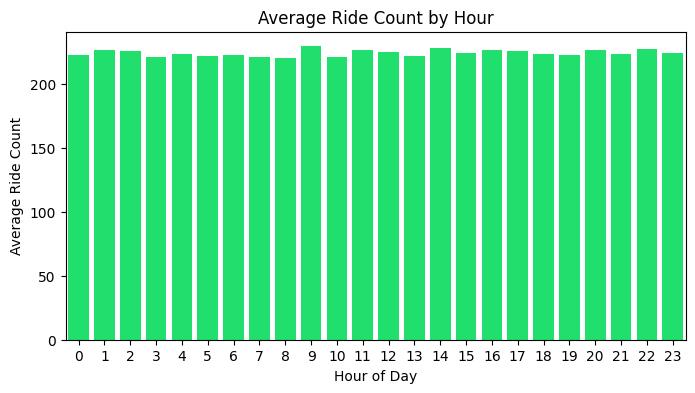

In [183]:
import numpy as np
plt.figure(figsize=(8,4))
sns.barplot(x='hour', y='count', data=data, estimator=np.mean, ci=None, color="#00FF66")
plt.title("Average Ride Count by Hour", color='black')
plt.xlabel("Hour of Day", color='black')
plt.ylabel("Average Ride Count", color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.show()


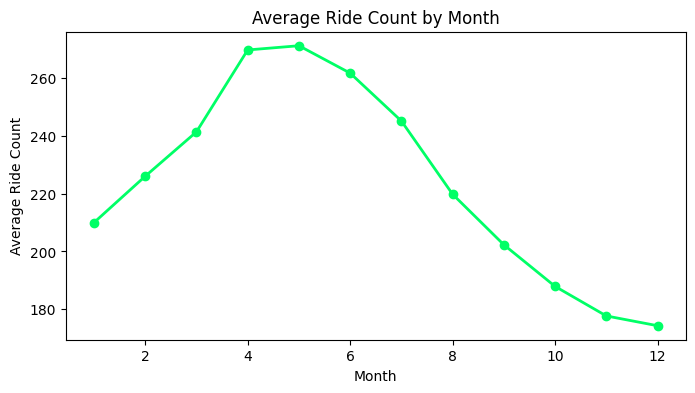

In [184]:
plt.figure(figsize=(8,4))
monthly = data.groupby('month')['count'].mean().reset_index()
plt.plot(monthly['month'], monthly['count'], marker='o', color="#00FF66", linewidth=2)
plt.title("Average Ride Count by Month", color="black")
plt.xlabel("Month", color='black')
plt.ylabel("Average Ride Count", color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.show()


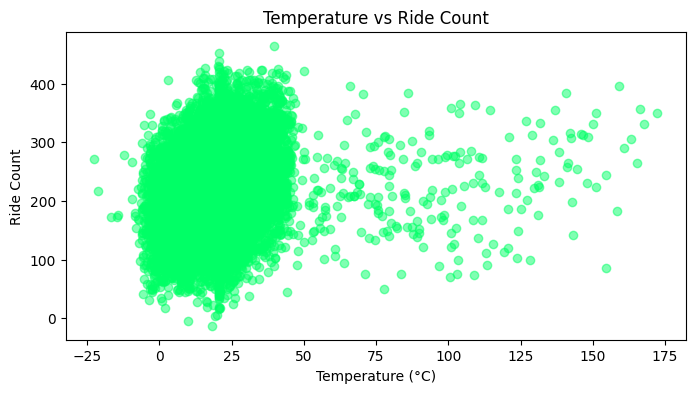

In [185]:
plt.figure(figsize=(8,4))
plt.scatter(data['temp'], data['count'], alpha=0.5, color="#00FF66")
plt.title("Temperature vs Ride Count", color="black")
plt.xlabel("Temperature (°C)", color='black')
plt.ylabel("Ride Count", color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.show()


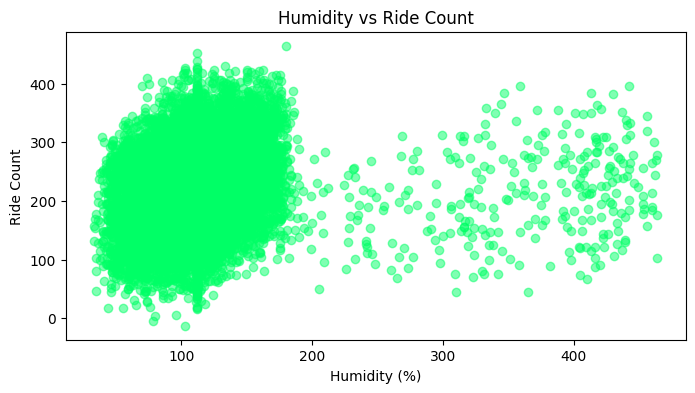

In [186]:
plt.figure(figsize=(8,4))
plt.scatter(data['humidity'], data['count'], alpha=0.5, color="#00FF66")
plt.title("Humidity vs Ride Count", color="black")
plt.xlabel("Humidity (%)", color='black')
plt.ylabel("Ride Count", color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.show()


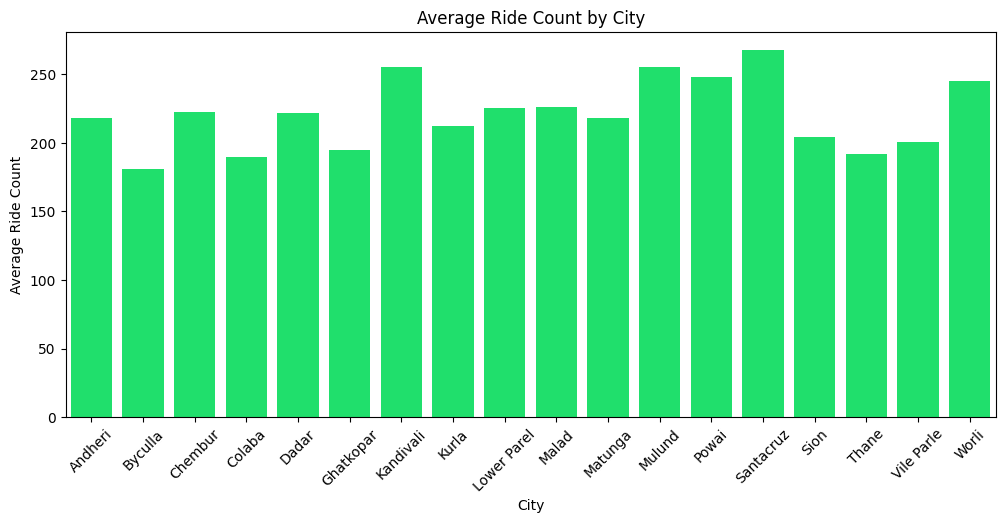

In [188]:
location_names = {
    0: 'Andheri', 1: 'Bandra', 2: 'Dadar', 3: 'Ghatkopar', 4: 'Thane',
    5: 'Borivali', 6: 'Kurla', 7: 'Vile Parle', 8: 'Colaba', 9: 'Mulund',
    10: 'Chembur', 11: 'Powai', 12: 'Sion', 13: 'Matunga', 14: 'Byculla',
    15: 'Worli', 16: 'Lower Parel', 17: 'Santacruz', 18: 'Malad', 19: 'Kandivali'
}
data['location_name'] = data['location'].map(location_names)

plt.figure(figsize=(12,5))
loc_avg = data.groupby('location_name')['count'].mean().reset_index()
sns.barplot(x='location_name', y='count', data=loc_avg, color="#00FF66")
plt.title("Average Ride Count by City", color="black")
plt.xlabel("City", color='black')
plt.ylabel("Average Ride Count", color='black')
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.show()


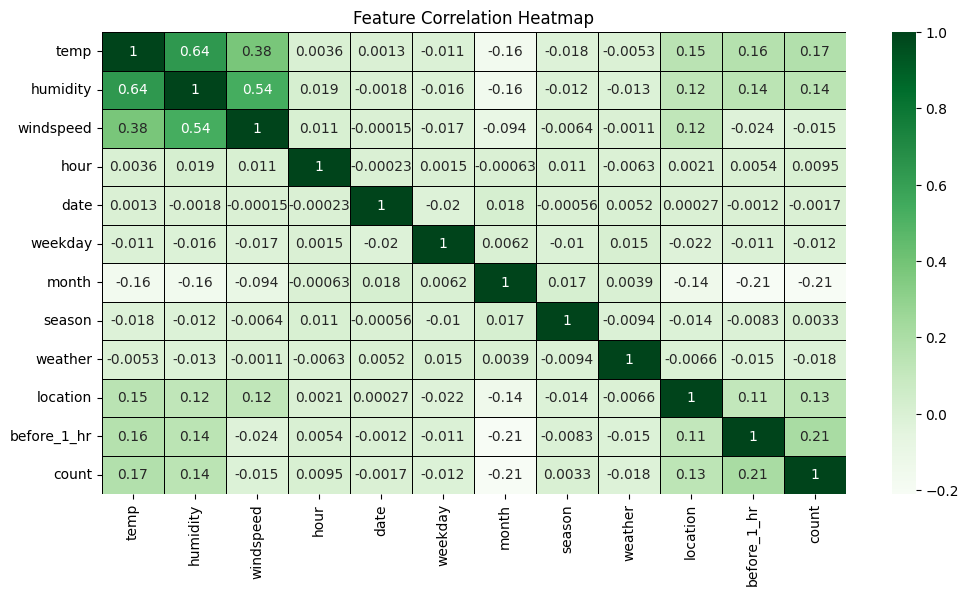

In [191]:
plt.figure(figsize=(12,6))
sns.heatmap(
    data[['temp','humidity','windspeed','hour','date','weekday','month','season','weather','location','before_1_hr','count']].corr(),
    annot=True, cmap='Greens', linecolor='black', linewidths=0.5
)
plt.title("Feature Correlation Heatmap", color="black")
plt.show()


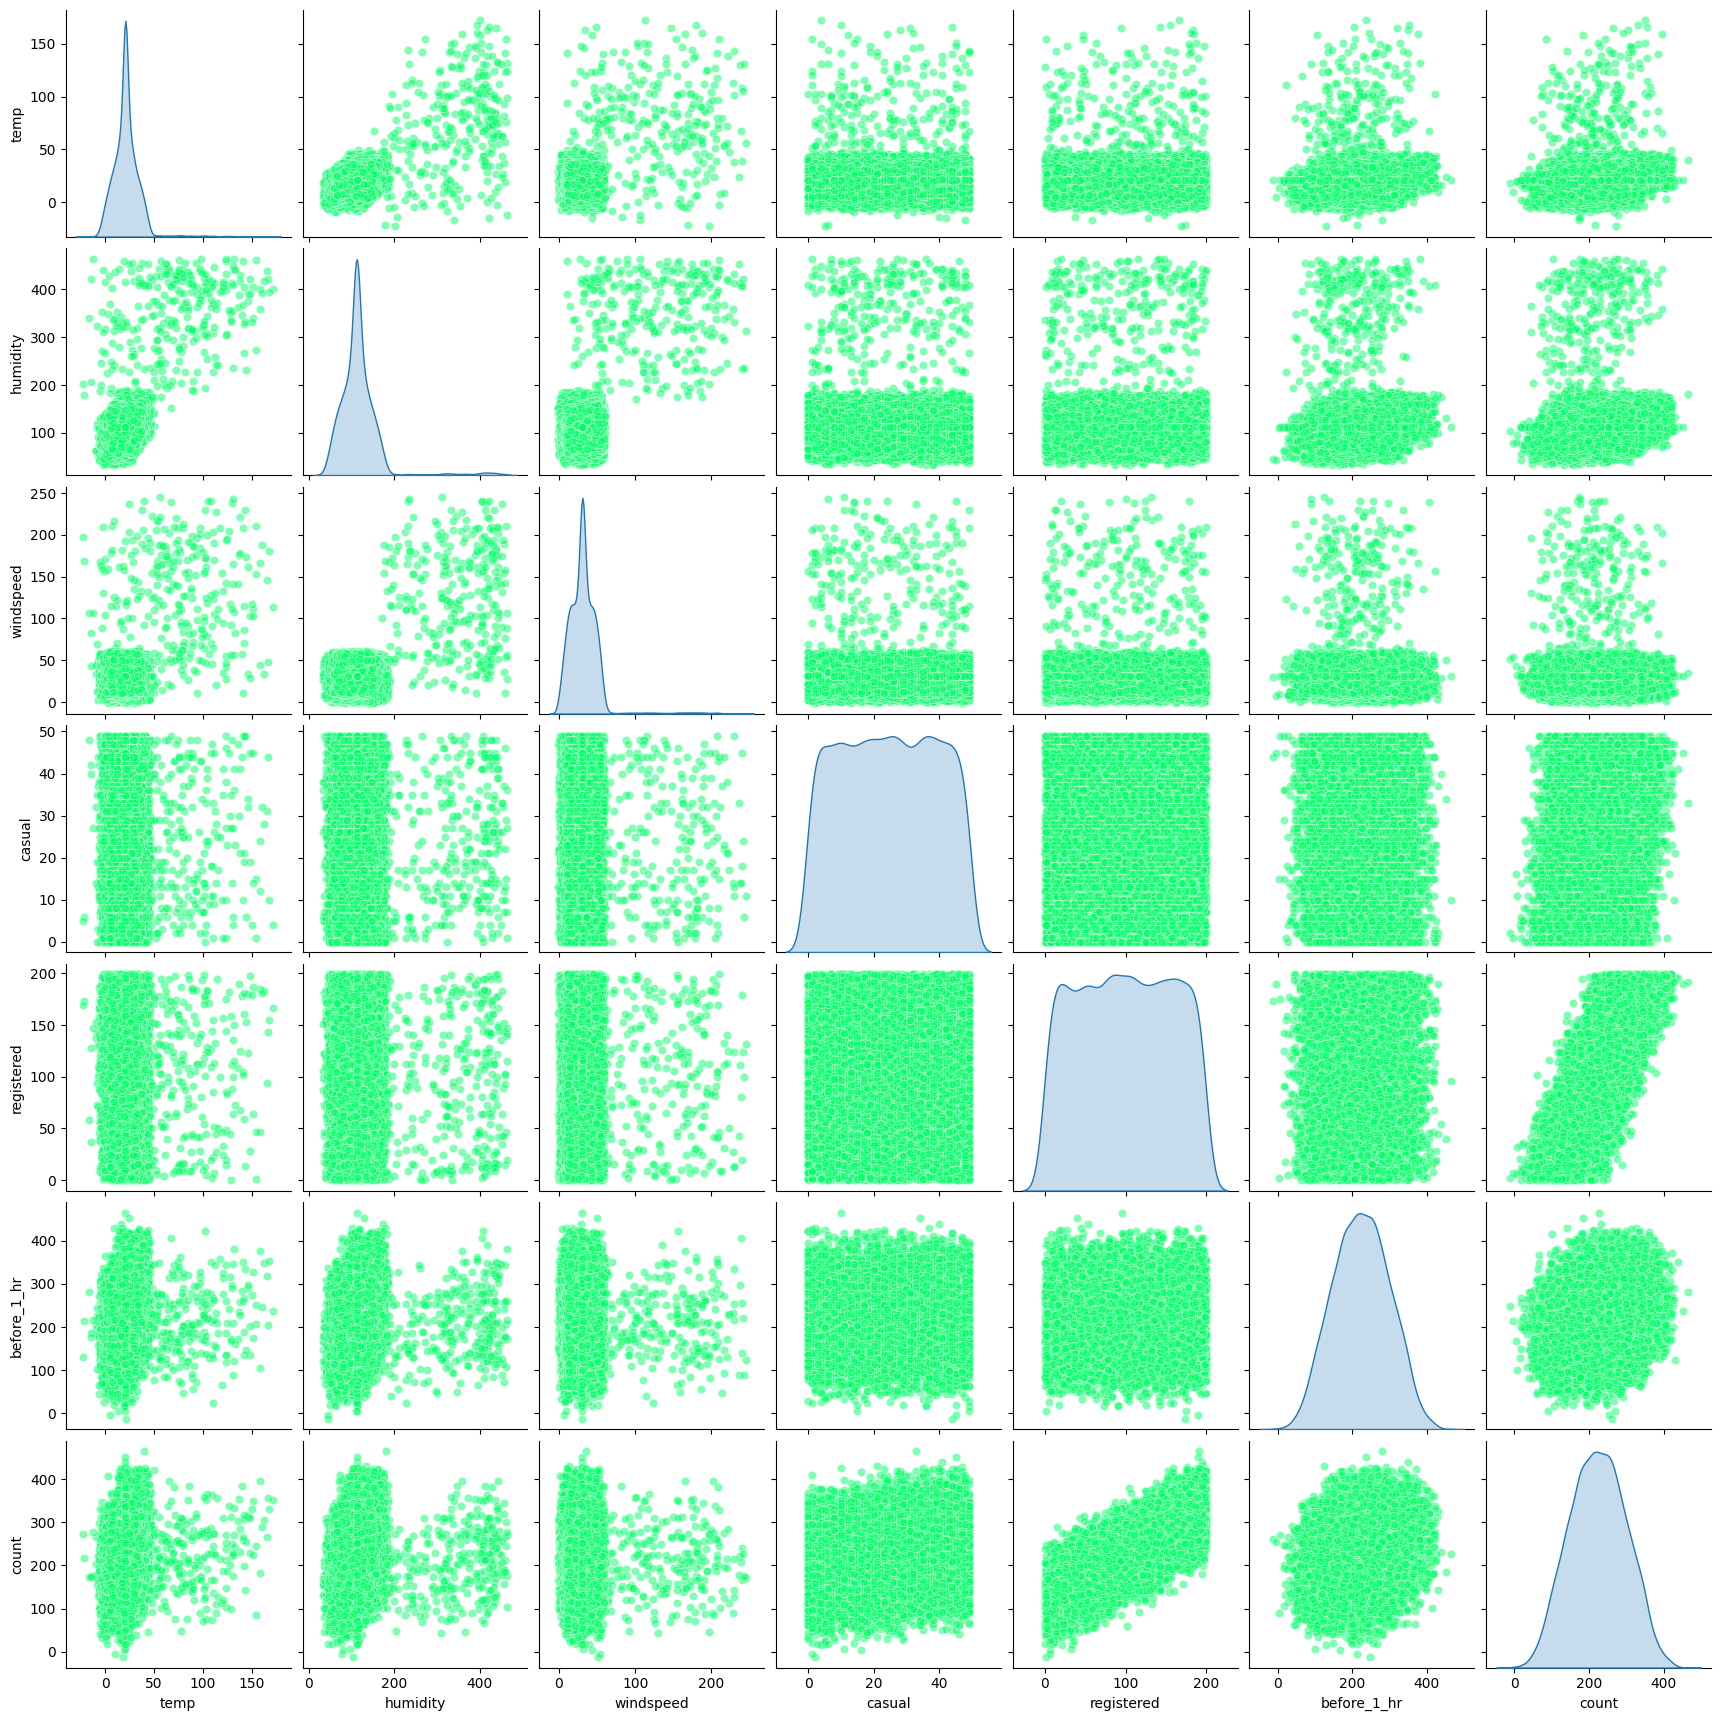

In [190]:
sns.pairplot(
    data[['temp','humidity','windspeed','casual','registered','before_1_hr','count']],
    diag_kind='kde', plot_kws={'color':'#00FF66', 'alpha':0.5}
)


PREPARING FEATURES FOR TRAINING

In [ ]:
#  FEATURES
train_features = [
    'temp', 'humidity',
    'season', 'weather',
    'hour', 'weekday', 'month',
    'before_1_hr','before_2_hr','before_3_hr','before_4_hr','before_5_hr','casual','registered',
    'roll_3','roll_6',
    'location'
]

X = data[train_features].copy()
y = data['count']

# One-hot encode ONLY true categorical cols
X = pd.get_dummies(X, columns=['season','weather'], drop_first=True)


TRAIN-TEST SPLIT

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False  # keep time series order
)


SCALING FOR LINEAR REGRESSION

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include='number').columns

X_train_lr = X_train.copy()
X_test_lr = X_test.copy()

X_train_lr[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_lr[numeric_cols] = scaler.transform(X_test[numeric_cols])


TRAINING MODELS

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=4, subsample=1.0, random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)



In [152]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def print_metrics(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("R2 :", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("\n")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("Gradient Boosting", y_test, y_pred_gb)


--- Linear Regression ---
R2 : 1.0
MAE: 2.9019823994694617e-13
MSE: 1.2979256020804464e-25


--- Random Forest ---
R2 : 0.7067649033912868
MAE: 30.22077560521415
MSE: 1386.2295377001863


--- Gradient Boosting ---
R2 : 0.8694549662853445
MAE: 20.727542691650672
MSE: 617.1341146684042




ACTUAL VS PREDICTED VISUAL

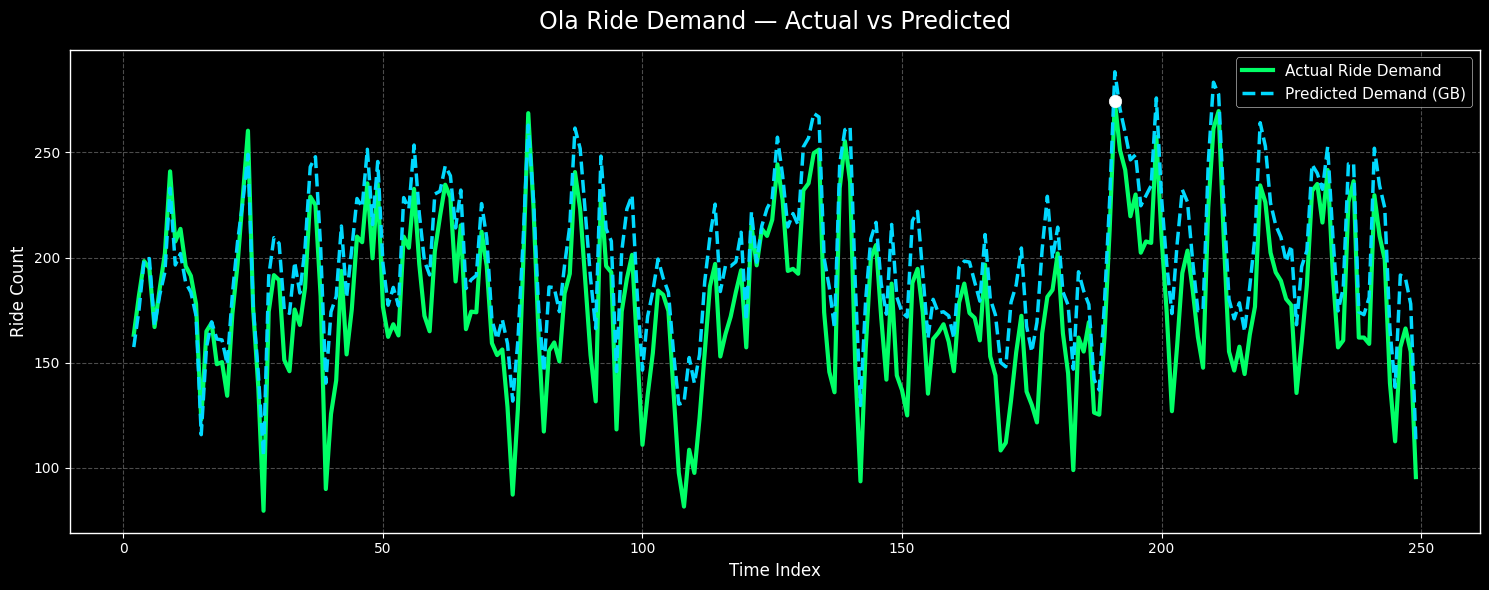

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Take a visible window (important)
n = 250
actual = pd.Series(y_test.values[:n]).rolling(3).mean()
predicted = pd.Series(y_pred_gb[:n]).rolling(3).mean()
x = np.arange(n)

plt.figure(figsize=(15,6))
plt.style.use('dark_background')

# Actual line (Ola green)
plt.plot(
    x, actual,
    color='#00FF66',
    linewidth=3,
    label='Actual Ride Demand'
)

# Predicted line (bright cyan)
plt.plot(
    x, predicted,
    color='#00D9FF',
    linewidth=2.5,
    linestyle='--',
    label='Predicted Demand (GB)'
)

# Emphasize peaks
plt.scatter(
    x[actual.idxmax()],
    actual.max(),
    color='white',
    s=80,
    zorder=5
)

# Titles
plt.title(
    "Ola Ride Demand — Actual vs Predicted",
    fontsize=17,
    pad=15,
    color='white'
)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Ride Count", fontsize=12)

# Grid
plt.grid(True, linestyle='--', alpha=0.3)

# Legend
plt.legend(fontsize=11, framealpha=0.9)

plt.tight_layout()
plt.show()


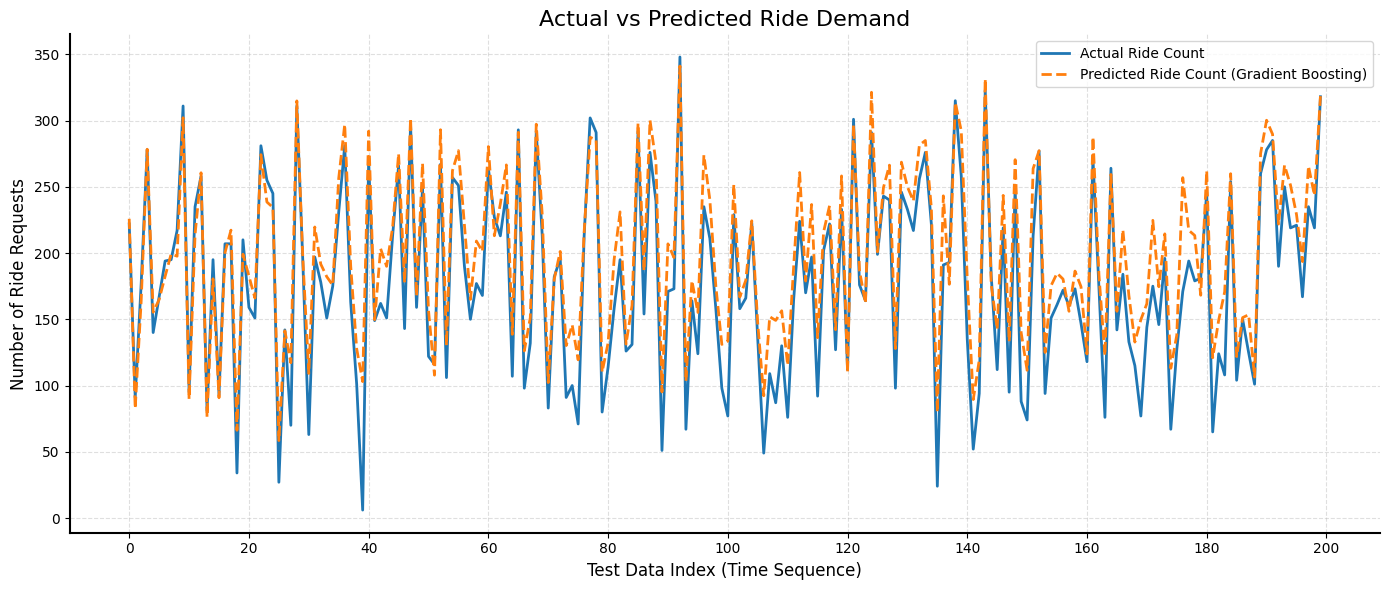

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# reset everything
plt.close('all')
plt.rcdefaults()

# limit points for clarity
n = 200
actual = y_test.values[:n]
predicted = y_pred_gb[:n]
x = np.arange(n)

fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor('white')

# plot
ax.plot(x, actual, label='Actual Ride Count', linewidth=2)
ax.plot(x, predicted, label='Predicted Ride Count (Gradient Boosting)',
        linestyle='--', linewidth=2)

# ---- AXIS LABELS (FORCED) ----
ax.set_xlabel('Test Data Index (Time Sequence)', fontsize=12)
ax.set_ylabel('Number of Ride Requests', fontsize=12)

# ---- TITLE ----
ax.set_title('Actual vs Predicted Ride Demand', fontsize=16)

# ---- AXIS LINES (FORCED) ----
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# ---- TICKS (FORCED) ----
ax.set_xticks(np.arange(0, n+1, 20))
ax.set_yticks(np.arange(0, int(max(actual.max(), predicted.max()))+50, 50))

ax.tick_params(axis='both', labelsize=10)

# ---- GRID ----
ax.grid(True, linestyle='--', alpha=0.4)

# ---- LEGEND ----
ax.legend()

plt.tight_layout()
plt.show()


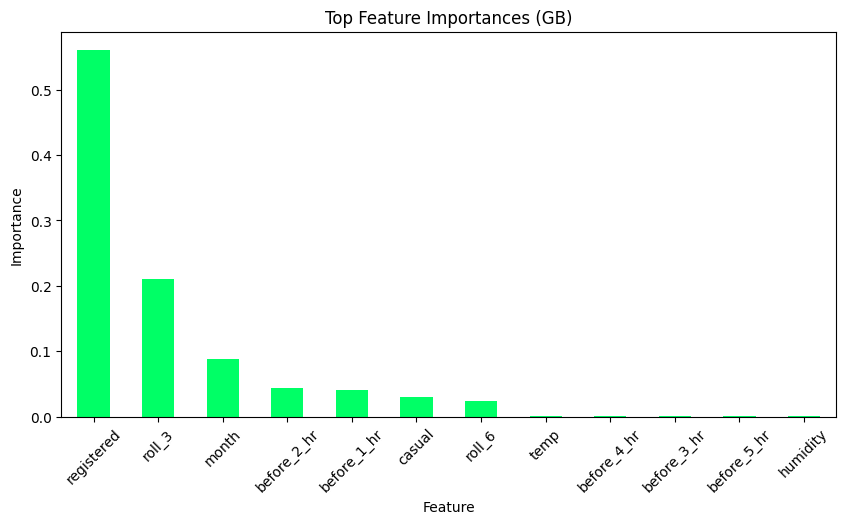

In [ ]:
# IMPORTANT FEATURE THAT HELPED GRADIENTBBOOSTING FOR PREDICTION

fi = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(12)
plt.figure(figsize=(10,5))
fi.plot(kind='bar', color="#00FF66")
plt.title("Top Feature Importances (GB)", color="black")
plt.xlabel("Feature", color='black')
plt.ylabel("Importance", color='black')
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.show()


OVERALL PEAK HOUR

In [ ]:
def hour_to_ampm(h):
    if h == 0:
        return "12 AM"
    elif h < 12:
        return f"{h} AM"
    elif h == 12:
        return "12 PM"
    else:
        return f"{h-12} PM"

hourly = data.groupby('hour')['count'].mean()

peak_hour = int(hourly.idxmax())
peak_value = int(round(hourly.max(), 0))   # rounded

print("📊 OVERALL PEAK HOUR (ALL LOCATIONS)")
print("-----------------------------------")
print(f"Peak Time : {hour_to_ampm(peak_hour)}")
print(f"Avg Rides : {peak_value}")


📊 OVERALL PEAK HOUR (ALL LOCATIONS)
-----------------------------------
Peak Time : 9 AM
Avg Rides : 229


PEAK HOUR PREDICTION LOCATION-WISE

In [ ]:

location_names = {
    0: 'Andheri',
    1: 'Bandra',
    2: 'Dadar',
    3: 'Ghatkopar',
    4: 'Thane',
    5: 'Borivali',
    6: 'Kurla',
    7: 'Vile Parle',
    8: 'Colaba',
    9: 'Mulund',
    10: 'Chembur',
    11: 'Powai',
    12: 'Sion',
    13: 'Matunga',
    14: 'Byculla',
    15: 'Worli',
    16: 'Lower Parel',
    17: 'Santacruz',
    18: 'Malad',
    19: 'Kandivali'
}


def hour_to_ampm(h):
    if h == 0:
        return "12 AM"
    elif h < 12:
        return f"{h} AM"
    elif h == 12:
        return "12 PM"
    else:
        return f"{h-12} PM"

per_loc = (
    data
    .groupby(['location','hour'])['count']
    .mean()
    .reset_index()
)

print("\n📍 PEAK RIDE HOURS BY MUMBAI LOCATION")
print("------------------------------------------------------")
print(f"{'Location':<18}{'Peak Time':<10}{'Avg Rides'}")
print("------------------------------------------------------")

for loc in sorted(per_loc['location'].unique()):
    temp = per_loc[per_loc['location'] == loc]
    
    if temp.empty or loc not in location_names:
        continue

    top_hr = temp.sort_values('count', ascending=False).iloc[0]

    loc_name = location_names[loc]
    hr = int(top_hr['hour'])
    val = int(round(top_hr['count'], 0))

    print(f"{loc_name:<18}{hour_to_ampm(hr):<10}{val}")



📍 PEAK RIDE HOURS BY MUMBAI LOCATION
------------------------------------------------------
Location          Peak Time Avg Rides
------------------------------------------------------
Andheri           2 PM      244
Dadar             1 AM      310
Ghatkopar         4 AM      307
Thane             5 AM      208
Kurla             1 AM      397
Vile Parle        10 PM     226
Colaba            10 PM     218
Mulund            11 AM     279
Chembur           4 AM      238
Powai             11 AM     273
Sion              11 AM     221
Matunga           8 PM      241
Byculla           11 AM     288
Worli             11 PM     263
Lower Parel       7 AM      326
Santacruz         9 PM      301
Malad             11 AM     234
Kandivali         5 PM      357


PEAK HOUR GRAPH BY CHOOSEN LOACATION

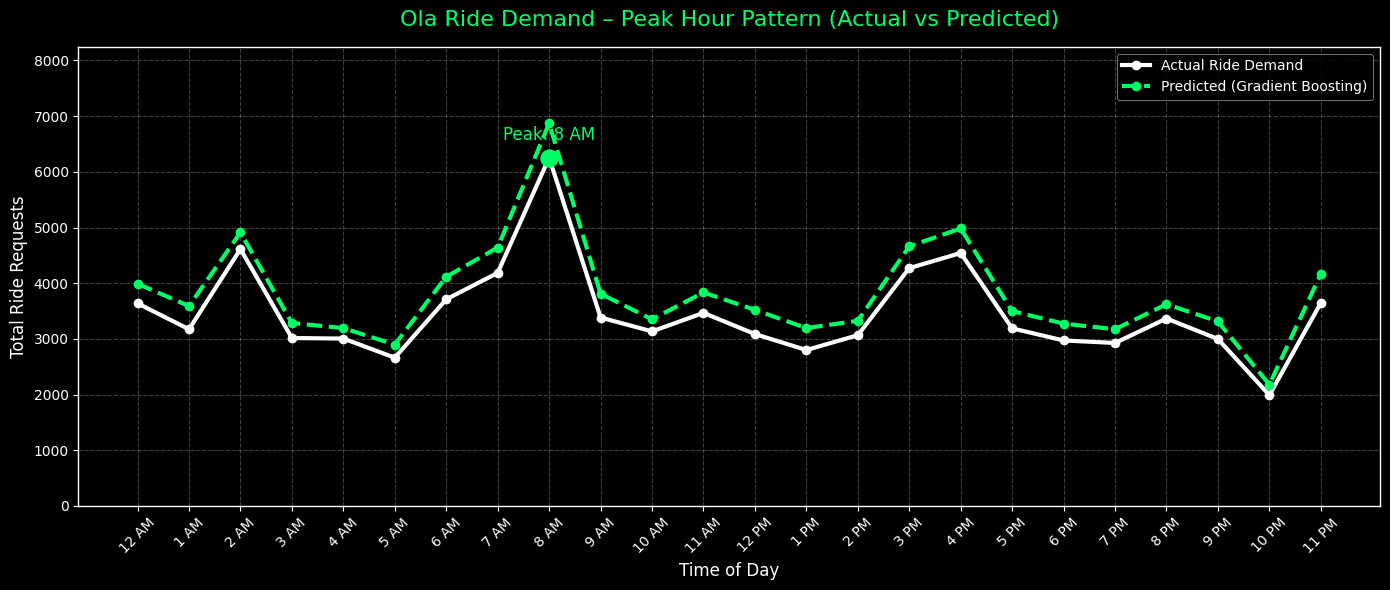

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


test_df = data.iloc[split:].copy()
test_df['actual'] = y_test.values
test_df['predicted'] = gb.predict(X_test)


chosen_loc_code = test_df['location'].mode()[0]   
loc_df = test_df[test_df['location'] == chosen_loc_code]


hourly = (
    loc_df
    .groupby('hour')[['actual','predicted']]
    .sum()
    .reset_index()
)


if hourly.empty:
    raise ValueError("No data after filtering. Check location encoding.")


def hour_to_ampm(h):
    if h == 0: return "12 AM"
    if h < 12: return f"{h} AM"
    if h == 12: return "12 PM"
    return f"{h-12} PM"

hourly['hour_label'] = hourly['hour'].apply(hour_to_ampm)


peak_hr = hourly.loc[hourly['actual'].idxmax()]


plt.figure(figsize=(14,6))
plt.style.use('dark_background')

# actual demand
plt.plot(
    hourly['hour'],
    hourly['actual'],
    color='white',
    linewidth=3,
    marker='o',
    label='Actual Ride Demand'
)

# predicted demand
plt.plot(
    hourly['hour'],
    hourly['predicted'],
    color='#00FF66',
    linewidth=3,
    linestyle='--',
    marker='o',
    label='Predicted (Gradient Boosting)'
)

# peak highlight
plt.scatter(
    peak_hr['hour'],
    peak_hr['actual'],
    color='#00FF66',
    s=160,
    zorder=6
)

plt.text(
    peak_hr['hour'],
    peak_hr['actual'] + 0.05 * peak_hr['actual'],
    f"Peak: {hour_to_ampm(int(peak_hr['hour']))}",
    color='#00FF66',
    fontsize=12,
    ha='center'
)

plt.title(
    "Ola Ride Demand – Peak Hour Pattern (Actual vs Predicted)",
    fontsize=16,
    color='#00FF66',
    pad=15
)

plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Total Ride Requests", fontsize=12)

plt.xticks(
    ticks=range(0,24),
    labels=[hour_to_ampm(h) for h in range(0,24)],
    rotation=45
)

plt.ylim(0, max(hourly['actual'].max(), hourly['predicted'].max()) * 1.2)

plt.grid(color='white', linestyle='--', alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


HOURLY RIDE DEMAND HEATMAP BY LOCATION

In [ ]:
import plotly.express as px

# AggregateD average rides per location per hour
heatmap_df = data.groupby(['location_name', 'hour'])['count'].mean().reset_index()
heatmap_df['count'] = heatmap_df['count'].round(0)  # round rides

# Pivot for heatmap
heatmap_pivot = heatmap_df.pivot(index='location_name', columns='hour', values='count').fillna(0)


fig = px.imshow(
    heatmap_pivot,
    labels=dict(x="Hour of Day", y="Location", color="Avg Rides"),
    x=[f"{hour_to_ampm(h)}" for h in heatmap_pivot.columns],
    y=heatmap_pivot.index,  
    color_continuous_scale=['#000000', '#00FF66'],  
    aspect="auto",
    text_auto=True
)

fig.update_layout(
    title="🟢 Hourly Ride Demand Heatmap by Location ",
    title_font_size=20,
    font=dict(color="white"),
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(tickangle=-45),
)

fig.show()


PEAK HOUR DEMAND PER LOCATION

C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_1648\1435083525.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  peak_df = data.groupby('location_name').apply(


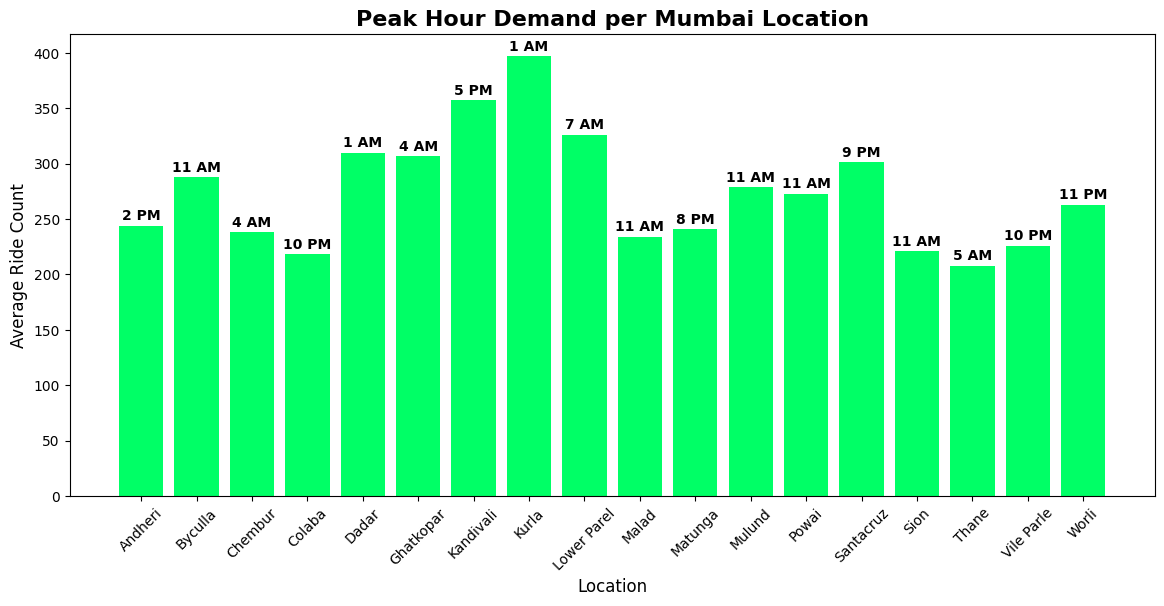

In [ ]:

location_names = {
    0: 'Andheri', 1: 'Bandra', 2: 'Dadar', 3: 'Ghatkopar', 4: 'Thane',
    5: 'Borivali', 6: 'Kurla', 7: 'Vile Parle', 8: 'Colaba', 9: 'Mulund',
    10: 'Chembur', 11: 'Powai', 12: 'Sion', 13: 'Matunga', 14: 'Byculla',
    15: 'Worli', 16: 'Lower Parel', 17: 'Santacruz', 18: 'Malad', 19: 'Kandivali'
}


data['location_name'] = data['location'].map(location_names)

peak_df = data.groupby('location_name').apply(
    lambda x: x.groupby('hour')['count'].mean().idxmax()
).reset_index()
peak_df.columns = ['location_name','peak_hour']

peak_df['avg_rides'] = peak_df.apply(
    lambda row: round(data[(data['location_name']==row['location_name']) & 
                           (data['hour']==row['peak_hour'])]['count'].mean(),0),
    axis=1
)

plt.figure(figsize=(14,6))
bars = plt.bar(
    peak_df['location_name'], 
    peak_df['avg_rides'], 
    color="#00FF66"
)
plt.xticks(rotation=45)
plt.title("Peak Hour Demand per Mumbai Location", fontsize=16, fontweight='bold')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Average Ride Count", fontsize=12)

# Label bars with AM/PM
for bar, hour in zip(bars, peak_df['peak_hour']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 5,
        hour_to_ampm(hour),
        ha='center',
        fontsize=10,
        fontweight='bold'
    )
plt.show()


In [200]:
# STEP 14
import joblib
joblib.dump(gb, "model.pkl")
# Save the exact feature names that model expects
joblib.dump(list(X_train.columns), "deploy_features.pkl")
print("Saved model.pkl and deploy_features.pkl")


Saved model.pkl and deploy_features.pkl


In [202]:
# Install FastAPI and Uvicorn if not installed
# !pip install fastapi uvicorn pydantic joblib

from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import joblib

# Load model and features
model = joblib.load("model.pkl")
deploy_features = joblib.load("deploy_features.pkl")

app = FastAPI(title="Ola Ride Prediction API")

# Define input data structure
class RideRequest(BaseModel):
    temp: float
    humidity: float
    windspeed: float
    hour: int
    season: str
    weather: str
    location: str
    before_1_hr: int = 0
    before_2_hr: int = 0
    before_3_hr: int = 0

@app.get("/")
def root():
    return {"message": "Welcome to Ola Ride Prediction API"}

@app.post("/predict")
def predict_ride(req: RideRequest):
    # Convert input to DataFrame
    df = pd.DataFrame([req.dict()])
    
    # One-hot encode categorical features (season, weather, location)
    df = pd.get_dummies(df)
    
    # Add missing columns (from training)
    for col in deploy_features:
        if col not in df.columns:
            df[col] = 0
    
    # Reorder columns
    df = df[deploy_features]
    
    # Predict
    pred = model.predict(df)[0]
    
    return {"predicted_rides": round(float(pred), 0)}
